# Energy per residue graphs

We extracted electrostatic energy values of the best structures from HADDOCK output file (ene-residue.disp file provided under the HADDOCK_runs/name-of-the-job/structures/it1/analysis directory) with the commands given below. 



For full-length EIF2G:EIF2BG;
```
>> awk '$1=="#Residue" || $2=="PREVIT:complex_8w.pdb"' ene-residue_iso1.disp | grep Residue | awk '{print $3, $4}' > full-length_residues

>> awk '$1=="#Residue" || $2=="PREVIT:complex_8w.pdb"' ene-residue_iso1.disp | grep PREVIT | awk '{print $5}' > full-length_energies


#We can separate the energy values of EIF2γ (A) and EIF2Bγ (B) by selecting chain IDs.

>> paste full-length_residues full-length_energies | sort -nk1 | awk '$2=="A"' > full-length_EIF2G-energies

>> paste full-length_residues full-length_energies | sort -nk1 | awk '$2=="B"' > full-length_EIF2BG-energies

rm full-length_energies full-length_residues 
```

For truncated EIF2G:EIF2BG;
```
>> awk '$1=="#Residue" || $2=="PREVIT:complex_17w.pdb"' ene-residue_iso2.disp | grep Residue | awk '{print $3, $4}' > truncated_residues

>> awk '$1=="#Residue" || $2=="PREVIT:complex_17w.pdb"' ene-residue_iso2.disp | grep PREVIT | awk '{print $5}' > truncated_energies


#We can separate the energy values of EIF2γ (A) and EIF2Bγ (B) by selecting chain IDs.

>> paste truncated_residues truncated_energies | sort -nk1 | awk '$2=="A"' > truncated_EIF2G-energies

>> paste truncated_residues truncated_energies | sort -nk1 | awk '$2=="B"' > truncated_EIF2BG-energies

rm truncated_energies truncated_residues

```

The residue numbers in the HADDOCK output belong to residue numbering in 5K0Y structure. So, we substracted the residue numbers with 13 to obtain residue numbering in 6K72 structure.

# Electrostatic energies per residue of EIF2γ

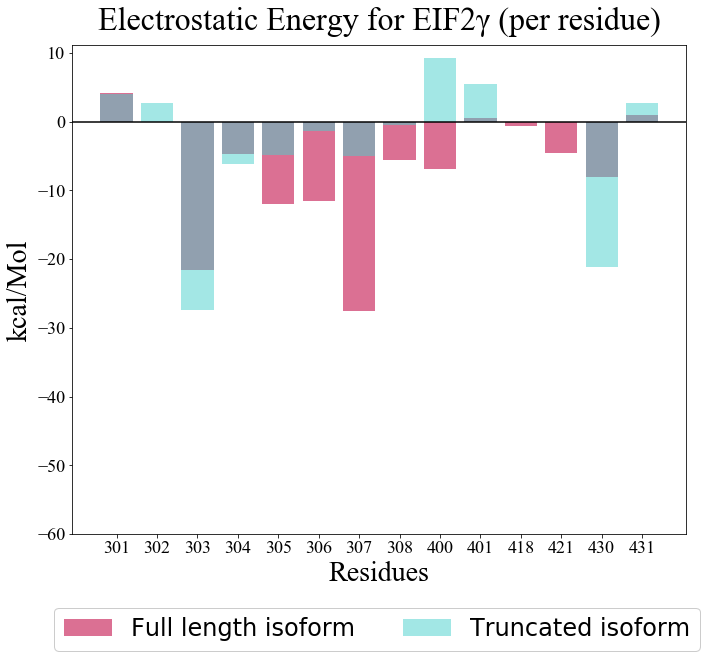

In [11]:
eif2_intercating_with_full_length_resi=["301","302","303", "304","305","306","307","308","400","401","418","421","430","431"]
eif2_intercating_with_full_length_elec=[4.13231,0,-21.6321,-4.74341,-11.9751,-11.5442,-27.5846,-5.57425,-6.9124,0.512248,-0.590695,-4.5113,-8.00922,0.991593]
eif2_intercating_with_truncated_resi=["301","302","303","304","305","306","307","308","400","401","430","431"]
eif2_intercating_with_truncated_elec=[4.06257,2.72516,-27.4665,-6.09998,-4.92339,-1.43882,-4.99731,-0.482384,9.29118,5.52999,-21.1046,2.64359]

import numpy as np

import matplotlib.pyplot as plt

f = plt.figure(figsize=(11,9))
ax=plt.gca()

ax.tick_params(labelsize=18)
for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax.set_xlabel("Residues", fontname= "Times New Roman", fontsize=28)
ax.set_ylabel("kcal/Mol", fontname= "Times New Roman", fontsize=28)
ax.set_title("Electrostatic Energy for EIF2γ (per residue)", fontname= "Times New Roman", fontsize=32, pad=15)

plt.bar(eif2_intercating_with_full_length_resi,eif2_intercating_with_full_length_elec, color="palevioletred", label="Full length isoform")
plt.bar(eif2_intercating_with_truncated_resi, eif2_intercating_with_truncated_elec, alpha=0.5, color="mediumturquoise", label="Truncated isoform")
plt.axhline(y=0, color="black")
plt.yticks(np.arange(-60, 15, 10))

lg=ax.legend(loc='upper left',bbox_to_anchor= (-0.03, -0.15), ncol=3,borderaxespad=0, framealpha=6, fontsize=24)

plt.savefig('EIF2g-Eelec', dpi=400, bbox_extra_artists=(lg,), bbox_inches='tight')

# Electrostatic energies per residue of EIF2Bγ

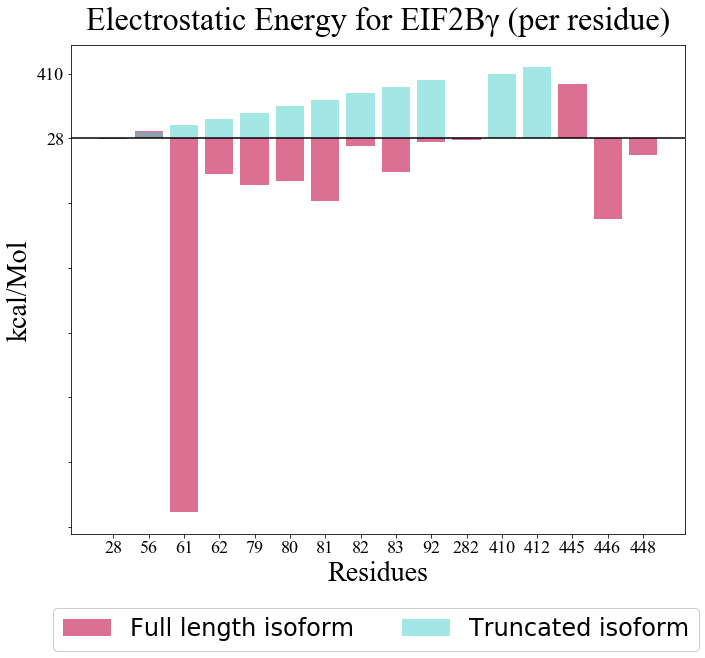

In [10]:
full_length_resi=["28","56","61","62","79","80","81","82","83","92","282","410","412","445","446","448"]
full_length_elec=[-8.47366E-02,1.11669,-57.6984,-5.53794,-7.2691,-6.61722,-9.62875,-1.10783,-5.21729,-0.504021,-0.303147,0,0,8.34928,-12.373,-2.49455]
truncated_resi=["28","56","61","62","79","80","81","82","83","92","410","412"]
truncated_elec=[0.123328,1.88518,-16.6498,0.162274,-8.48591,-1.37312,-17.8734,0.541608,-18.3532,-0.296889,10.2982,3.39524]

f = plt.figure(figsize=(11,9))
ax=plt.gca()

ax.tick_params(labelsize=18)
for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax.set_xlabel("Residues", fontname= "Times New Roman", fontsize=28)
ax.set_ylabel("kcal/Mol", fontname= "Times New Roman", fontsize=28)
ax.set_title("Electrostatic Energy for EIF2Bγ (per residue)", fontname= "Times New Roman", fontsize=32, pad=15)

plt.bar(full_length_resi, full_length_elec, color="palevioletred", label="Full length isoform")
plt.bar(truncated_resi, truncated_resi, alpha=0.5, color="mediumturquoise", label="Truncated isoform")
plt.axhline(y=0, color="black")
plt.yticks(np.arange(-60, 15, 10))

lg=ax.legend(loc='upper left',bbox_to_anchor= (-0.03, -0.15), ncol=3,borderaxespad=0, framealpha=6, fontsize=24)

plt.savefig('EIF2Bg-Eelec', dpi=400, bbox_extra_artists=(lg,), bbox_inches='tight')